# Environments

[![Click and Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/metadriverse/metaurban/blob/main/documentation/source/rl_environments.ipynb)

<a id='environments'></a>

By default, there are 2 off-the-shelf RL environments:
- Static environment
- Dynamic environment

## Environment Overview

<img src="figs/urbanscene_gallery.gif" width="864" class="center">

We developed an RL environment through procedural generation where maps are composed by connecting various types of road blocks, followed by objects on sidewalks and then traffic vehicles, pedestrians and robots are scattered on maps randomly.
Thus the environment can generate an unlimited number of diverse driving scenarios.
By training RL agents in one set of scenarios and testing them in another held-out set, we can benchmark the generalizability of the driving policy. 

You can experience this environment through the following script:
```bash
# args
# --observation: lidar, all (lidar + rgb + depth + semantic)
# --density_obj: 0~2
python -m metaurban.examples.drive_in_static_env
```
And the following script creates basic environments if you are using this environment in your code:

In [1]:
from metaurban import SidewalkStaticMetaUrbanEnv
import tqdm

training_env = SidewalkStaticMetaUrbanEnv(dict(
    use_render=False,
    map='X',
    manual_control=False,
    
    num_scenarios=1000,
    start_seed=1000,
    training=True,
    random_lane_width=True,
    random_agent_model=True,
    random_lane_num=True,
    
    crswalk_density=1,
    object_density=0.2,
    walk_on_all_regions=False,
    
    drivable_area_extension=55,
    height_scale=1,
    show_mid_block_map=False,
    show_ego_navigation=False,
    debug=False,
    horizon=300,
    on_continuous_line_done=False,
    out_of_route_done=True,
    vehicle_config=dict(
        show_lidar=False,
        show_navi_mark=False,
        show_line_to_navi_mark=False,
        show_dest_mark=False,
        enable_reverse=True,
    ),
    show_sidewalk=True,
    show_crosswalk=True,
    random_spawn_lane_index=False,
    accident_prob=0,
    relax_out_of_road_done=True,
    max_lateral_dist=5.0,
))


test_env = SidewalkStaticMetaUrbanEnv(dict(
    use_render=False,
    map='X',
    manual_control=False,
    
    num_scenarios=200,
    start_seed=0,
    training=True,
    random_lane_width=True,
    random_agent_model=True,
    random_lane_num=True,
    
    crswalk_density=1,
    object_density=0.2,
    walk_on_all_regions=False,
    
    drivable_area_extension=55,
    height_scale=1,
    show_mid_block_map=False,
    show_ego_navigation=False,
    debug=False,
    horizon=300,
    on_continuous_line_done=False,
    out_of_route_done=True,
    vehicle_config=dict(
        show_lidar=False,
        show_navi_mark=False,
        show_line_to_navi_mark=False,
        show_dest_mark=False,
        enable_reverse=True,
    ),
    show_sidewalk=True,
    show_crosswalk=True,
    random_spawn_lane_index=False,
    accident_prob=0,
    relax_out_of_road_done=True,
    max_lateral_dist=5.0,
))

[INFO] Environment: SidewalkStaticMetaUrbanEnv
[INFO] MetaUrban version: 0.0.1
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 300
[INFO] Environment: SidewalkStaticMetaUrbanEnv
[INFO] MetaUrban version: 0.0.1
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 300


User can specify the training set with 1000 driving scenarios by setting `num_scenarios=1000` and `start_seed=1000`, while creating the test set by setting `num_scenarios=200` and `start_seed=0`.
In this case, the scenarios generated by random seeds [1000, 1999] will be used to train the agents and those by [0, 199] will be used to test the trained agent.

**Note: Please note that each process should only have one single MetaUrban instance due to the limit of the underlying simulation engine, but sometimes we want to have one environment for training and the other one for testing.** There are two ways to overcome this:
1. Launching the training environment and test environment in two separate processes using tools like `Ray` or `stablebaseline3.SubprocVecEnv`. The training and test environments are naturally hosted in training workers (processes) and evaluation workers. Therefore we do not worry about this singleton problem.
2. Closing the training environment `training_env.close()` before launch the test environment via `test_env.reset()`. After evaluation, it is allowed to restore the training environment after closing the test environment by simply `training_env.reset()`. An example is as follows.

In [2]:
for training_epoch in range(2):
    # training
    training_env.reset()
    print("\nStart fake training epoch {}...".format(training_epoch))
    for _ in range(10):
        # execute 10 step
        training_env.step(training_env.action_space.sample())
    training_env.close()

    # evaluation
    print("Evaluate checkpoint for training epoch {}...\n".format(training_epoch))
    test_env.reset()
    for _ in range(10):
        # execute 10 evaluation step
        test_env.step(test_env.action_space.sample())
    test_env.close()

assert test_env.config is not training_env.config

[INFO] Assets version: 0.0.1
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 1000
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions



Start fake training epoch 0...


[INFO] Assets version: 0.0.1
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 200


Evaluate checkpoint for training epoch 0...



[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Assets version: 0.0.1
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 1000
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions



Start fake training epoch 1...


[INFO] Assets version: 0.0.1
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 200


Evaluate checkpoint for training epoch 1...



[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions


### Randomization

The other config `dict(random_lane_width=True, random_agent_model=True, random_lane_num=True)` specifies if the agent model, lane num and lane width will be randomized to make the scenarios more diverse. In the following example, we sample 50 scenarios from the training set and show the statistics.

In [ ]:
# container
env_seed=1000
lane_nums = set()
lane_widths = set()

# collect statistics
maps_to_sample = 50
end_seed = training_env.config["start_seed"] + maps_to_sample
for env_seed in tqdm.tqdm(range(training_env.config["start_seed"], end_seed)):
    
    # use `seed` argument to choose which scenario to run
    training_env.reset(seed=env_seed)
    lane_nums.add(training_env.current_map.config["lane_num"]) 
    lane_widths.add(training_env.current_map.config["lane_width"])
    
training_env.close()

# show information
print("Number of lanes in {} maps are: {}".format(maps_to_sample, lane_nums))
print("{} maps have {} different widths".format(maps_to_sample, len(lane_widths)))

# check
assert lane_nums == {2, 3}
assert len(lane_widths) == 50

There are more config terms for customizing this environment. The full config with comprehensive annotations is at [metaurban_DEFAULT_CONFIG](https://github.com/metadriverse/metaurban/blob/main/metaurban/envs/sidewalk_static_env.py).
Most of the fields are configuration for the reward, cost, termination function, while some of them can be changed to customize the environment. 

### Map

The other important fields are map-related ones. It allows you to adjust map properties like the number of lanes and the structures. The full map config is
```python
map_config={
    BaseMap.GENERATE_TYPE: MapGenerateMethod.BIG_BLOCK_NUM, 
    BaseMap.GENERATE_CONFIG: None,  # it can be a file path / block num / block ID sequence
    BaseMap.LANE_WIDTH: 3.5,
    BaseMap.LANE_NUM: 3,
},
```
First of all, we need to determine the `GENERATE_TYPE`. The BIG algorithm provides two ways to generate map:

1. `config["map_config"]["type"] = "block_num"`: the user specifies the number of blocks in each map so that the PG algorithm will automatically build maps containing that number of blocks while randomizing all parameters including the type of blocks.
2. `config["map_config"]["type"] = "block_sequence"`: the user specify the sequence of block types and PG algorithm will build maps strictly following that order while randomizing the parameters in each block.

Let's first introduce the `block_num` generation method. The following example shows how to generate maps in this way with other parameters changed. The first row shows maps generated with 3 blocks; The second row shows maps generated with 5 blocks; The last row shows maps generated with 5 blocks where each road has 4 lanes. As these maps are generated with the same random seed, in each column, each map is a part of another larger one or has a similar structure with another.   

In [1]:
from metaurban.envs import SidewalkStaticMetaUrbanEnv
from metaurban.component.map.base_map import BaseMap
from metaurban.policy.idm_policy import IDMPolicy
from metaurban.component.map.pg_map import MapGenerateMethod
import matplotlib.pyplot as plt
from metaurban.utils.draw_top_down_map import draw_top_down_map
import logging

[WARNING] Not set var:walk_on_all_regions, so that agents can walk on all regions (orca_navigation.py:561)
[WARNING] Not set var:walk_on_all_regions, so that agents can walk on all regions (orca_navigation.py:561)
[WARNING] Not set var:walk_on_all_regions, so that agents can walk on all regions (orca_navigation.py:561)


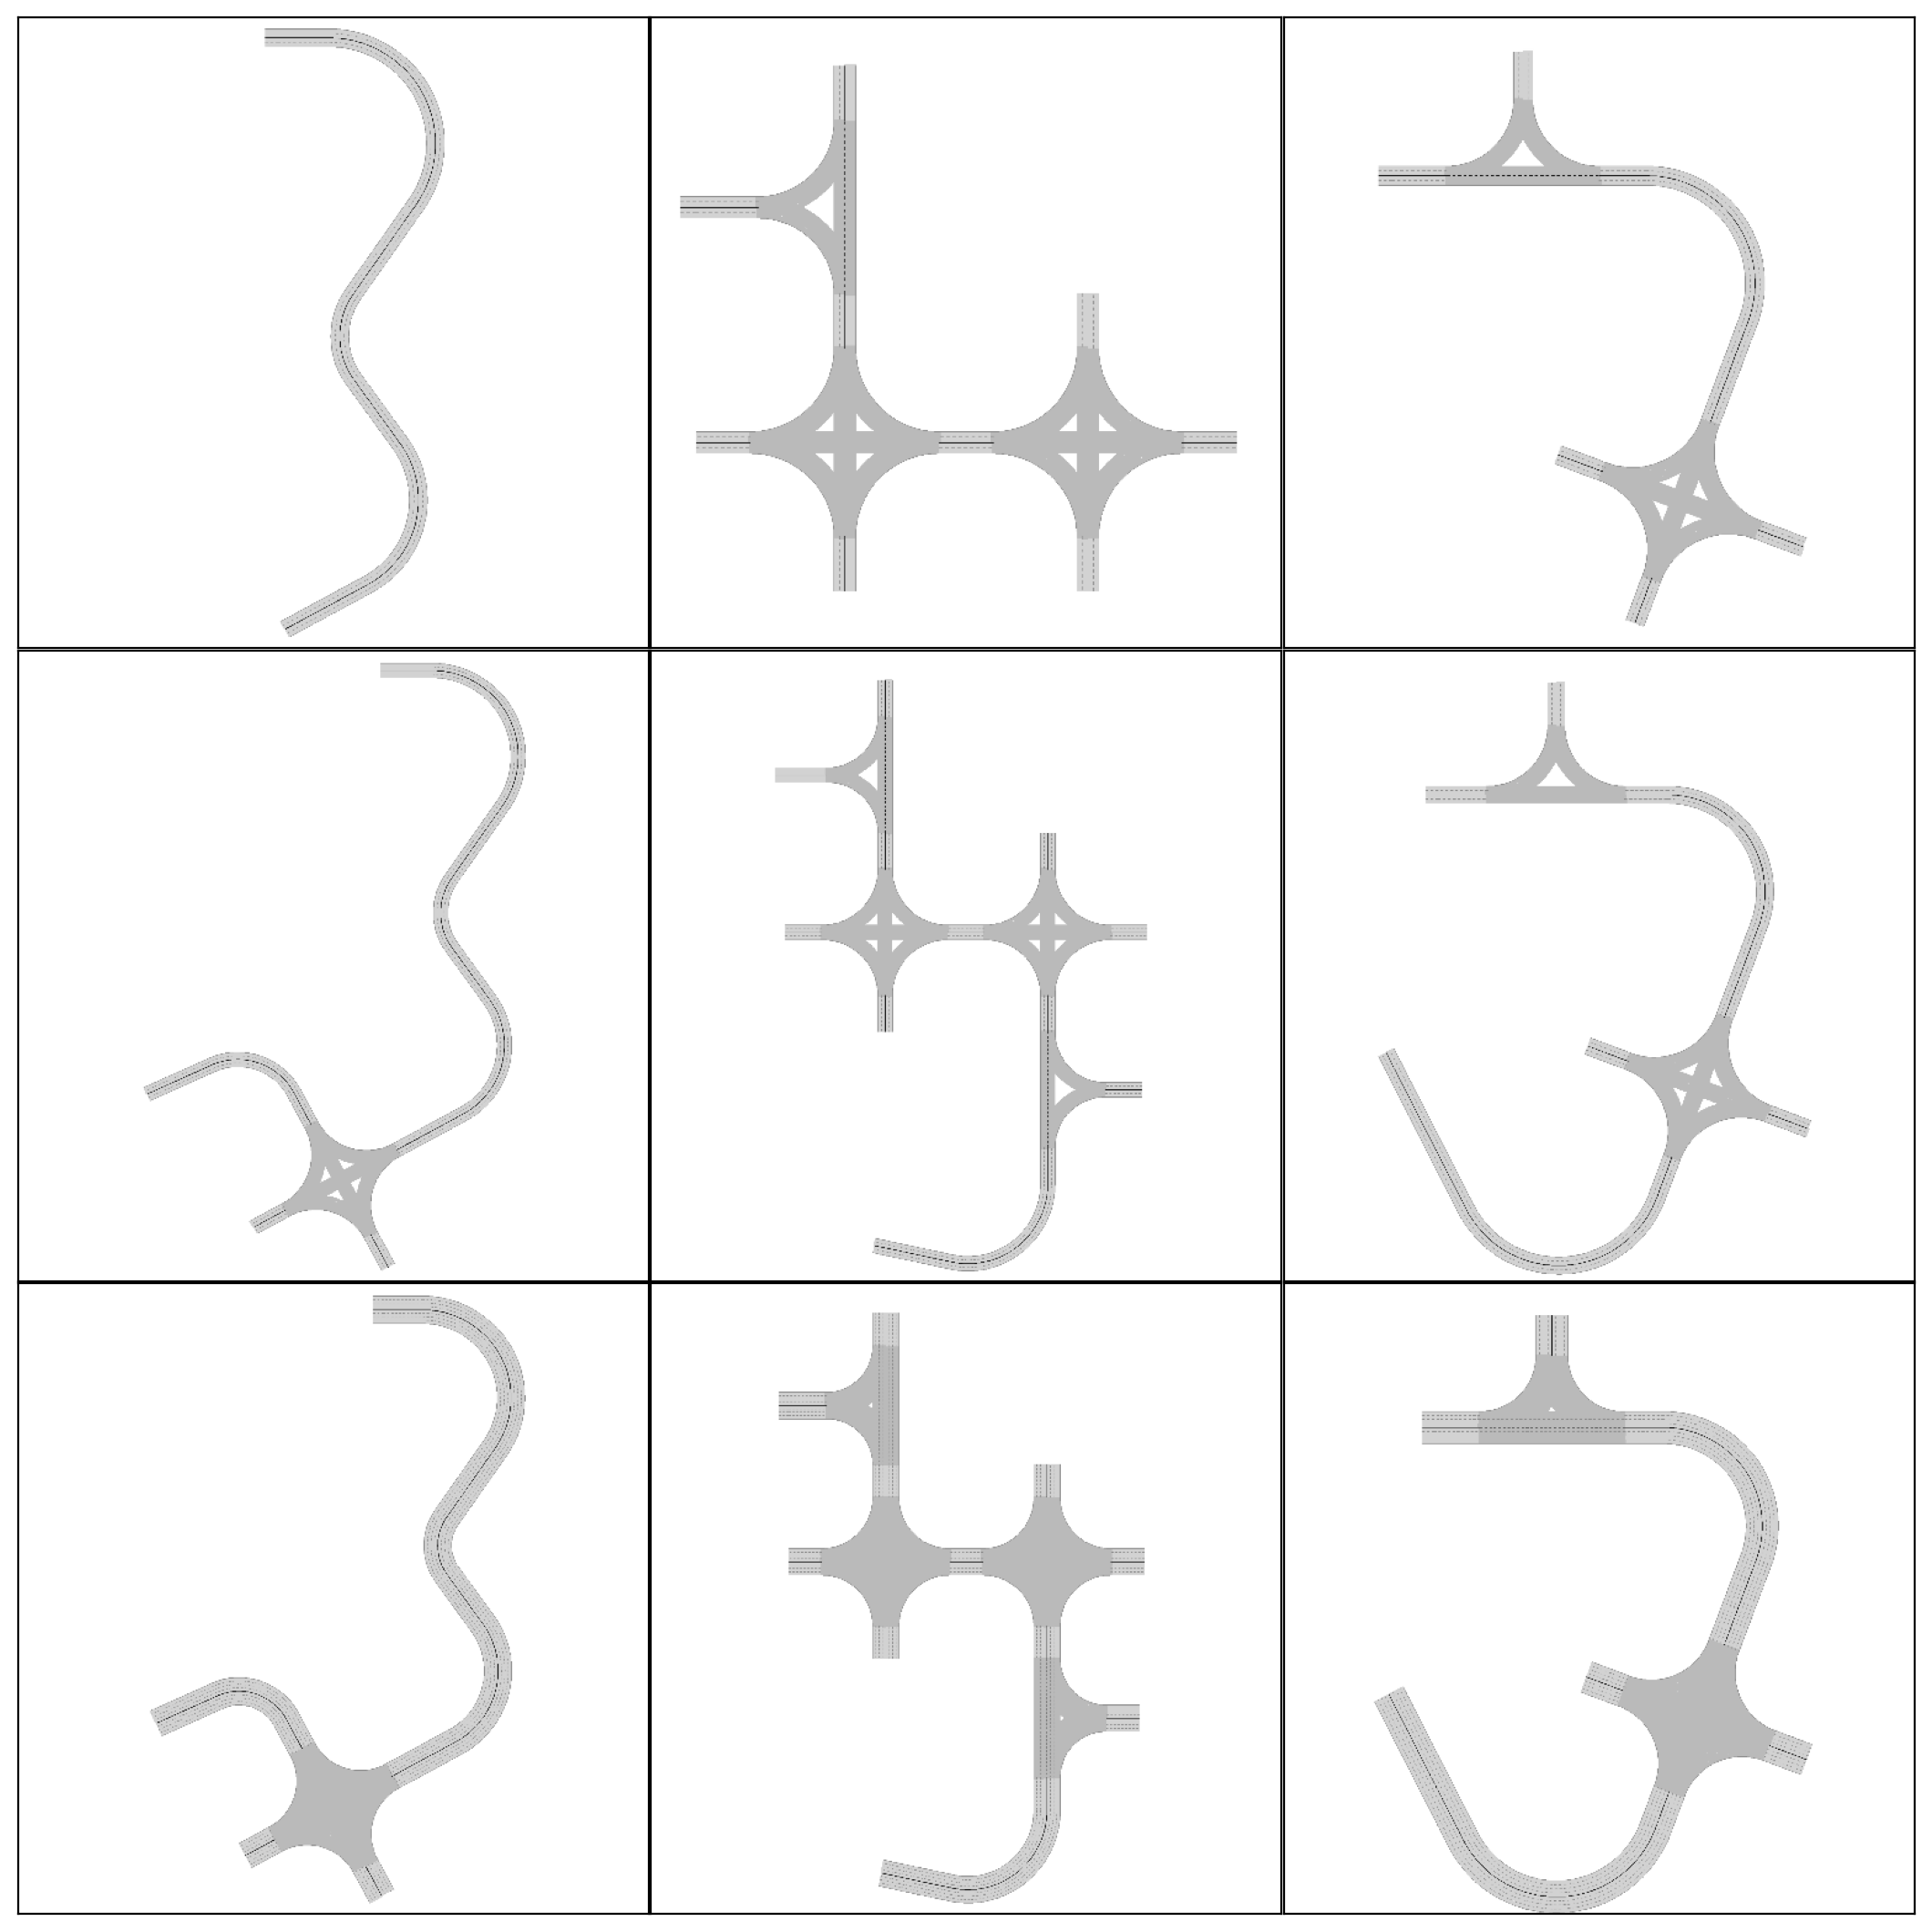

In [2]:
map_config={BaseMap.GENERATE_TYPE: MapGenerateMethod.BIG_BLOCK_NUM, 
            BaseMap.GENERATE_CONFIG: 3,  # 3 block
            BaseMap.LANE_WIDTH: 3.5,
            BaseMap.LANE_NUM: 2}

fig, axs = plt.subplots(3, 3, figsize=(10, 10), dpi=200)
plt.tight_layout(pad=-3)

for i in range(3):
    if i==0:
        map_config["config"]=3
        env = SidewalkStaticMetaUrbanEnv(dict(num_scenarios=10, object_density=0.1, map_config=map_config, log_level=logging.WARNING))
    elif i==1:
        map_config["config"]=5
        env = SidewalkStaticMetaUrbanEnv(dict(num_scenarios=10, object_density=0.1, map_config=map_config, log_level=logging.WARNING))
    elif i==2:
        map_config["config"]=5
        map_config["lane_num"]=4
        env = SidewalkStaticMetaUrbanEnv(dict(num_scenarios=10, object_density=0.1, map_config=map_config, log_level=logging.WARNING))
    for j in range(3):
        env.reset(seed=j)
        m = draw_top_down_map(env.current_map)
        ax = axs[i][j]
        ax.imshow(m, cmap="bone")
        ax.set_xticks([])
        ax.set_yticks([])
    env.close()
plt.show()

You can also specify the shape of the map with `BaseMap.GENERATE_TYPE=MapGenerateMethod.BLOCK_SEQUENCE`. Block sequence is a string with character selected from the following tables:

<table style="width:100%; border-collapse: collapse;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">Block Type</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">ID</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">Block Type</th>
        <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">ID</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">Straight</td>
        <td style="border: 1px solid #ddd; padding: 8px;">S</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Circular</td>
        <td style="border: 1px solid #ddd; padding: 8px;">C</td>
    </tr>
        <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">InRamp</td>
        <td style="border: 1px solid #ddd; padding: 8px;">r</td>
        <td style="border: 1px solid #ddd; padding: 8px;">OutRamp</td>
        <td style="border: 1px solid #ddd; padding: 8px;">R</td>
    </tr>
        <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">Roundabout</td>
        <td style="border: 1px solid #ddd; padding: 8px;">O</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Intersection</td>
        <td style="border: 1px solid #ddd; padding: 8px;">X</td>
    </tr>
        <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">Merge</td>
        <td style="border: 1px solid #ddd; padding: 8px;">y</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Split</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Y</td>
    </tr>
        <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">Tollgate</td>
        <td style="border: 1px solid #ddd; padding: 8px;">$</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Parking lot</td>
        <td style="border: 1px solid #ddd; padding: 8px;">P</td>
    </tr>
        </tr>
        <tr>
        <td style="border: 1px solid #ddd; padding: 8px;">TInterection</td>
        <td style="border: 1px solid #ddd; padding: 8px;">T</td>
        <td style="border: 1px solid #ddd; padding: 8px;">Fork</td>
        <td style="border: 1px solid #ddd; padding: 8px;">WIP</td>
    </tr>
</table>


The number of block equals to the length of the string to specify the block sequence.

If you only want to change the number and width of lanes, you don't need to set the complex `map_config`. You can use `map` to quickly configure it. User can set a string or int as the value to generate map in an easier way. For example, `config["map"] = 3` means generating a map containing 3 blocks, while `config["map"] = "SCrRX"` means the first block is Straight, and the following blocks are Circular, InRamp, OutRamp and Intersection. The character here are the unique ID of different types of blocks as shown in the table above. 
In a nutshell, if the value of `map` is a number, the map generation method would be `BIG_BLOCK_NUM`. If the value is a string, the map generation method would be `BIG_BLOCK_SEQUENCE`.

### Termination
The termination or done function defines when the `tm` from `_,_,tm,_,_ = env.step()` should `True`. In the example above, you will find the scenario ends up with collision. That is because we defined that *when crash happens, the episode should end* in `env.done_function`. This all environments should have this function. Besides the official done function, users are encouraged to design their own `done_function` as well. It should be something like:

In [3]:
from metaurban.utils import print_source
from metaurban import SidewalkStaticMetaUrbanEnv
print_source(SidewalkStaticMetaUrbanEnv.done_function)

def done_function(self, vehicle_id: str):
    vehicle = self.agents[vehicle_id]
    done = False
    max_step = self.config["horizon"] is not None and self.episode_lengths[vehicle_id] >= self.config["horizon"]
    done_info = {
        TerminationState.CRASH_VEHICLE: vehicle.crash_vehicle,
        TerminationState.CRASH_OBJECT: vehicle.crash_object,
        TerminationState.CRASH_BUILDING: vehicle.crash_building,
        TerminationState.CRASH_HUMAN: vehicle.crash_human,
        TerminationState.CRASH_SIDEWALK: vehicle.crash_sidewalk,
        TerminationState.OUT_OF_ROAD: self._is_out_of_road(vehicle),
        TerminationState.SUCCESS: self._is_arrive_destination(vehicle) and not self._is_out_of_road(vehicle),
        TerminationState.MAX_STEP: max_step,
        TerminationState.ENV_SEED: self.current_seed,
        # TerminationState.CURRENT_BLOCK: self.agent.navigation.current_road.block_ID(),
        # crash_vehicle=False, crash_object=False, crash_building=False, out_of_road=False, 

This is the done function of `SidewalkStaticMetaUrbanEnv`. There are several config can turn off/turn on specific done conditions like `crash_vehicle_done` and `crash_object_done`. When they are set to `False`, the crash won't throw a termination signal out. More termination config is available at <a href="reward_cost_done.html#termination-and-truncation">Reward, Cost and Termination</a>.

## Customization
We are developing new environments for benchmarking novel and challenging RL tasks! Any idea on the design of new tasks are welcomed!

However, you may want to do development with MetaUrban and build your own environments from scratch. To this end, you have to be familiar with some basic concepts of MetaUrban and how the simulation works.



## GymWrapper
Some legacy training frameworks may use the `openai.gym` interface whose `step()` function returns `obs`, `reward`, `termination`, and `info`. For making MetaUrban compatible with these training code, we provide an official wrapper for **all** environments of MetaUrban. The wrapped environment will have an `openai.gym` style APIs. Also, you can access all properties and methods of wrapped env using the same syntax. For example, we can still access the ego car via `env.agent`, even if the env is wrapped on top of `SidewalkStaticMetaUrbanEnv`. 

[INFO] Environment: SidewalkStaticMetaUrbanEnv
[INFO] MetaUrban version: 0.0.1
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): None
[INFO] Assets version: 0.0.1
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 1
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Agents are expected to walk on main sidewalks and crosswalks, not all regions
[INFO] Episode ended! Scenario Index: 0 Reason: arrive_dest.


Agent id: d8fafa32-c462-4955-b250-b7b376919d9b


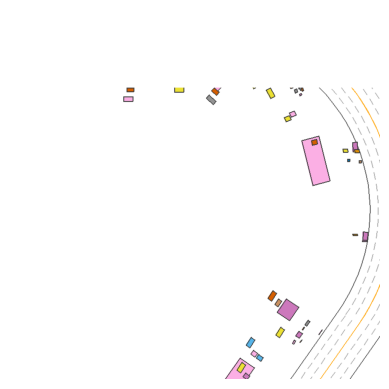

In [1]:
from metaurban.envs.gym_wrapper import createGymWrapper
from metaurban.envs import SidewalkStaticMetaUrbanEnv
import matplotlib.pyplot as plt

env_config = {"object_density": 0.2, 'walk_on_all_regions': False}
gym_env = createGymWrapper(SidewalkStaticMetaUrbanEnv)(env_config)
try:
    o = gym_env.reset()
    o,r,d,i = gym_env.step([0,0])
    print("Agent id:", gym_env.agent.id)
    ret=gym_env.render(mode="topdown", 
                       window=False,
                       camera_position=(50, -70))
finally:
    gym_env.close()
    
plt.axis('off')    
plt.imshow(ret)